In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
ds = pd.read_csv("C:/Users/tvpia/Desktop/Final project/final-project/your-project/Datasets/ds_flagged.csv")
pd.set_option('max_columns', 150)

In [104]:
ds.drop(columns="Unnamed: 0",inplace=True)

In [105]:
ds_std =ds.copy()

In [106]:
ds.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,37,2,98,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
features = ds_std[['age','accuracy']]

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

ds_std[['age','accuracy']]=features_std

In [ ]:
features = ds.drop(columns="country",axis=1)

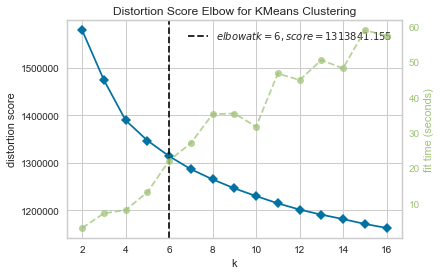

In [16]:
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,17))
visualizer.fit(features)
visualizer.poof()

In [ ]:
#4 cluster seems the most appropriate

In [43]:
#Lets find the number of clusters removing if we classify contries into english speaking capitalism / vs other
import numpy as np
eng_cap= ["US","GB","AU","NZ"]
ds["cap_other"]=np.where(ds.country.isin(eng_cap),0,1)

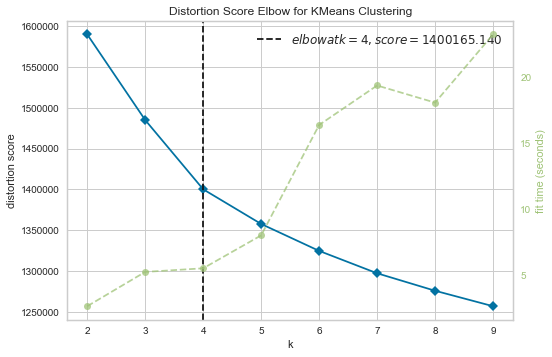

In [11]:
features = ds.drop(columns="country",axis=1)

import yellowbrick
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(features)
visualizer.poof()

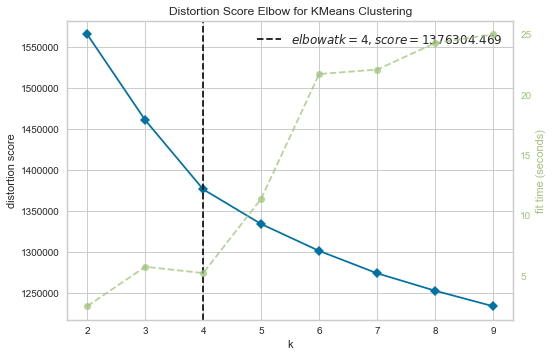

In [15]:
features = ds.drop(columns=["country","gender","cap_other"],axis=1)

import yellowbrick
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(features)
visualizer.poof()

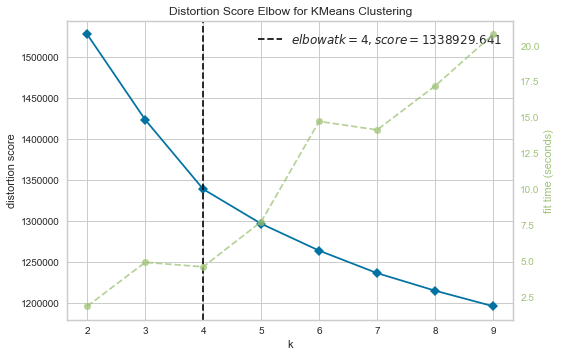

In [16]:
features = ds.drop(columns=["country","cap_other","age"],axis=1)

import yellowbrick
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(features)
visualizer.poof()

In [54]:
# Create k-mean object
n_clusters = 4
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1).fit(ds.drop(columns=["country","cap_other","age"],axis=1))

In [55]:
# Silhouette Score
from sklearn.metrics import silhouette_score
features = ds.drop(columns=["country","cap_other","age"],axis=1)
preds = cluster.fit_predict(features)
centers = cluster.cluster_centers_
print(centers)

score = silhouette_score (features, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")

[[ 3.53865426e+00  1.94953472e+00  2.83500358e+00  2.80637079e+00
   3.64307445e+00  4.15649606e+00  2.64835361e+00  3.41383321e+00
   3.38045812e+00  3.01547960e+00  3.65112742e+00  3.21698282e+00
   3.79652827e+00  4.10424123e+00  3.20436650e+00  2.59019327e+00
   2.92707588e+00  2.49132069e+00  3.48147817e+00  3.96331424e+00
   3.35066213e+00  2.99507874e+00  1.26288475e+00 -1.40970564e-02
   5.67435576e-01  2.95275591e-03  7.24767359e-03  4.20544023e-03
   6.97924123e-03  2.95275591e-03  4.47387258e-03  5.10021475e-03
   3.57909807e-03  4.02648533e-03  2.77380100e-03  1.96850394e-03
   4.11596278e-03  2.95275591e-03  3.31066571e-03  8.14244810e-03
   7.78453830e-03  6.53185397e-03  5.01073729e-03  2.41589120e-03
   1.43163923e-03  1.96850394e-03  3.22118826e-03]
 [ 4.04931320e+00  3.84321247e+00  3.91263457e+00  2.82811533e+00
   3.00426927e+00  4.00773419e+00  4.00996164e+00  3.24229675e+00
   4.08018810e+00  2.24539042e+00  2.12127212e+00  2.09683208e+00
   2.73833684e+00  3.7802

In [20]:
# Your code here:
ds["labels"]=ds_cluster.labels_

In [23]:
# Your code here:
ds.groupby("labels").count()

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672,6672
1,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359
2,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618,6618
3,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005,9005
4,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814,11814
5,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161,11161


Do cluster visualization

In [22]:
ds.head(5)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,labels
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,1.033490,2,0.900357,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,4,2,2,4,3,4,4,5,4,3,4,4,2,4,3,2,2,3,4,4,4,3,0.754712,3,0.713834,PL,0.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,5,5,5,4,2,5,5,4,4,2,2,2,2,4,4,2,4,3,3,4,4,2,-0.360400,2,-0.218785,AU,0.78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,4,1,2,2,4,5,2,2,5,2,4,2,4,0,5,5,4,1,4,2,3,4,-0.174548,1,0.962532,US,0.54,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3
4,5,3,4,5,5,5,4,5,4,3,4,3,4,4,4,2,5,2,4,4,1,5,-0.453326,2,0.402961,US,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn import datasets

# Load the data

features = ds.drop(columns="country",axis=1)

# Standardize the feature matrix


# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)
# ica = FastICA(n_components=0.99, whiten=True)

# Conduct PCA
features_pca = pca.fit_transform(features)

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

#the features have no more meanings but the relationship between the points is still the same

Original number of features: 48
Reduced number of features: 24


Clustering features after PCA, 

C:\Users\tvpia\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\tvpia\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


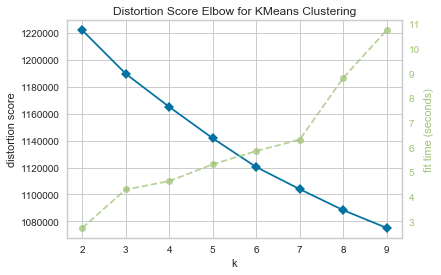

In [16]:
#features = ds.drop(columns=["country","cap_other","age"],axis=1)

import yellowbrick
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(features_pca)
visualizer.poof()

Clustering PCA after changing counties to english speaking capitalists vs other

In [18]:
#Lets find the number of clusters removing if we classify contries into english speaking capitalism / vs other
import numpy as np
eng_cap= ["US","GB","AU","NZ"]
ds["cap_other"]=np.where(ds.country.isin(eng_cap),0,1)

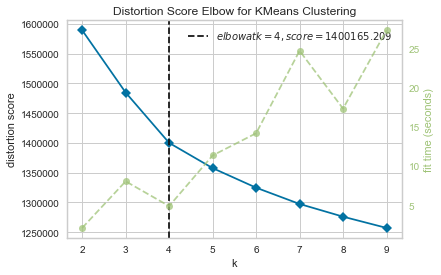

In [19]:
features = ds.drop(columns="country",axis=1)

import yellowbrick
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(features)
visualizer.poof()

In [21]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn import datasets

# Load the data

features = ds.drop(columns="country",axis=1)

# Standardize the feature matrix


# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)
# ica = FastICA(n_components=0.99, whiten=True)

# Conduct PCA
features_pca = pca.fit_transform(features)

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

#the features have no more meanings but the relationship between the points is still the same

Original number of features: 49
Reduced number of features: 25


In [25]:
#lets try with k=3 first
n_clusters = 5
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)

In [26]:
# Train model
model = cluster.fit(features_pca)

In [27]:
# Silhouette Score
from sklearn.metrics import silhouette_score

preds = cluster.fit_predict(features_pca)
centers = cluster.cluster_centers_
print(centers)

score = silhouette_score (features, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")

[[ 0.06635919 -0.11390369  0.15793387 -0.07201677 -0.01182834 -0.3534036
  -0.30213786 -0.2433365  -0.09048286 -0.1008058  -0.11348742  0.09541212
   0.18416303  0.37577608  0.17971011  0.17462459 -0.04437408  0.013435
  -0.16180362  0.0322758   0.0173138  -0.43014332  0.12756717 -0.16840679
  -0.734533  ]
 [ 0.12019446 -0.0831722  -0.16763361 -0.00339632 -0.31157986 -0.07588213
  -0.05533539 -0.13291221  0.47156372  2.31477974 -0.55616156  0.02654803
   0.31426201 -0.57562117  0.05268949 -0.43356061  0.26968726  0.06157928
   0.02350309  0.15379908 -0.01778565 -0.14141104  0.07657185 -0.04136467
   0.2355653 ]
 [ 0.04075918 -0.26750405  0.01186129  0.3229579   0.07451186  0.08068159
  -0.21782611  0.06550039  0.00473143 -0.23224035 -0.0959761  -0.15681921
  -0.0367239   0.12967105  0.20600237  0.17907416 -0.21132533  0.04324673
  -0.19850527 -0.10167161  0.01603071 -0.08469612  0.03188237  0.25546091
   1.12433045]
 [ 0.91509987  0.01593022 -0.22394186 -0.68388906  0.03197043  0.15660

Let's try with our most complete dataset, taking into account only the pyschological features

In [56]:
ds1 = pd.read_csv("C:/Users/tvpia/Desktop/Final project/final-project/your-project/Datasets/ds_full.csv")
pd.set_option('max_columns', 150)

In [57]:
ds1.drop(columns="Unnamed: 0",inplace=True)

In [58]:
ds1.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,DDPScale,DDNScale,DDMScale
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,37,2,98,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.25,0.3


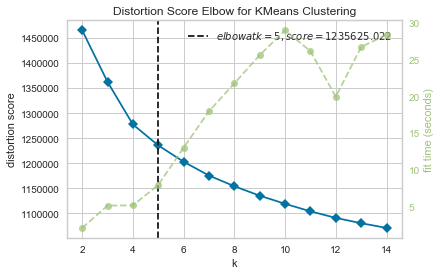

In [61]:
features = ds1.drop(columns=["country","accuracy","age","gender"],axis=1)

import yellowbrick
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(features)
visualizer.poof()

In [91]:
#lets try with k=5 first as the Elbow test tells us so
n_clusters = 5
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)
features = ds1.drop(columns=["country","accuracy","age","gender","label"],axis=1)

# Train model
model = cluster.fit(features)

from sklearn.metrics import silhouette_score

preds = cluster.fit_predict(features)
centers = cluster.cluster_centers_
print(centers)

score = silhouette_score (features, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")

[[4.43234767e+00 2.93671595e+00 3.61704749e+00 3.97815860e+00
  4.39717742e+00 4.62970430e+00 3.71583781e+00 4.41789875e+00
  4.32213262e+00 3.88194444e+00 4.32269265e+00 4.17428315e+00
  4.38888889e+00 4.51780914e+00 4.52856183e+00 4.11021505e+00
  4.36178315e+00 3.97603047e+00 4.48286290e+00 4.63866487e+00
  4.36099910e+00 4.17887545e+00 7.28940412e-01 1.12007168e-03
  3.24820789e-03 1.00806452e-03 3.69623656e-03 1.68010753e-03
  4.25627240e-03 2.35215054e-03 1.00806452e-03 1.79211470e-03
  1.00806452e-03 1.45609319e-03 2.35215054e-03 1.00806452e-03
  2.91218638e-03 2.35215054e-03 3.92025090e-03 1.90412186e-03
  3.58422939e-03 1.12007168e-03 2.12813620e-03 8.96057348e-04
  7.84050179e-04 8.70183692e-01 8.48829525e-01 8.83070116e-01]
 [3.51459957e+00 1.92864520e+00 2.83316121e+00 2.77880011e+00
  3.61318186e+00 4.14505680e+00 2.62369731e+00 3.37949488e+00
  3.36597503e+00 2.98892123e+00 3.61919069e+00 3.18542860e+00
  3.77692235e+00 4.09351235e+00 3.16364661e+00 2.54990142e+00
  2.874

In [92]:
from sklearn.cluster import KMeans
#adding labels to the dataframe
ds1['label5'] = model.labels_

In [93]:
ds1.label5.value_counts()

3    13266
2    11868
1    10651
0     8923
4     7921
Name: label5, dtype: int64

In [94]:
ds1.groupby("label5")[["HSNScale","DDPScale","DDNScale","DDMScale"]].mean()
#Even though the silhouette score is lower than for k = 4 (0.08 isntead of 0.34)
#the group size and the average personalities are better differenciated, so we will keep this model before going into explroatory analysis

,HSNScale,DDPScale,DDNScale,DDMScale
label5,,,,
0,0.728945,0.870257,0.848823,0.883128
1,0.563675,0.733739,0.552253,0.683072
2,0.706904,0.637626,0.769228,0.712155
3,0.604205,0.463467,0.617126,0.524122
4,0.450383,0.376928,0.429195,0.386056


In [69]:
#lets try with k=4 as our previous tests recommended so, see if we can improve silhouette score
n_clusters = 4
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)
features = ds1.drop(columns=["country","accuracy","age","gender"],axis=1)

# Train model
model = cluster.fit(features)

from sklearn.metrics import silhouette_score

preds = cluster.fit_predict(features)
centers = cluster.cluster_centers_
print(centers)

score = silhouette_score (features, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")

[[4.04547156e+00 3.84119261e+00 3.90980539e+00 2.81979790e+00
  2.99382485e+00 4.00467814e+00 4.00873253e+00 3.23197355e+00
  4.07690868e+00 2.23502994e+00 2.11077844e+00 2.08651447e+00
  2.72523703e+00 3.77002246e+00 4.19061876e+00 3.67882984e+00
  3.33414421e+00 2.78255988e+00 2.89745509e+00 3.68500499e+00
  3.31405938e+00 2.33738772e+00 6.58647705e-01 1.62175649e-03
  1.24750499e-03 1.24750499e-03 4.36626747e-03 3.86726547e-03
  4.80289421e-03 1.18512974e-03 1.18512974e-03 1.12275449e-03
  1.62175649e-03 4.67814371e-03 5.67614770e-03 3.18113772e-03
  2.99401198e-03 2.74451098e-03 3.11876248e-03 4.11676647e-03
  3.68013972e-03 3.55538922e-03 2.43263473e-03 1.74650699e-03
  3.55538922e-03 5.34627620e-01 6.99307635e-01 6.11695359e-01]
 [2.93597417e+00 2.93274531e+00 3.02252323e+00 1.96164750e+00
  2.22688612e+00 3.27319263e+00 3.11820759e+00 2.11159238e+00
  3.00417389e+00 1.68294220e+00 1.57087730e+00 1.51874311e+00
  1.91085210e+00 2.89659789e+00 3.09237675e+00 2.60072452e+00
  2.091

In [84]:
#lets try with k=4 and taking into account all the features except country
n_clusters = 4
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)
features = ds1.drop(columns=["country"],axis=1)

# Train model
model = cluster.fit(features)

from sklearn.metrics import silhouette_score

preds = cluster.fit_predict(features)
centers = cluster.cluster_centers_
print(centers)

score = silhouette_score (features, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")

[[3.71762027e+00 3.20409906e+00 3.50042699e+00 2.75035582e+00
  3.13122687e+00 3.92741247e+00 3.48676345e+00 3.18531170e+00
  3.71818958e+00 2.51238258e+00 2.57244520e+00 2.48875605e+00
  3.02049530e+00 3.71904355e+00 3.68943923e+00 3.19783661e+00
  2.99032166e+00 2.65186450e+00 2.90890976e+00 3.60546541e+00
  3.13748933e+00 2.48420154e+00 2.51781953e+01 1.44776544e+00
  3.87984629e+01 6.12428124e-01 7.68573868e-03 1.13862795e-02
  9.67833760e-03 1.19555935e-02 1.13862795e-02 9.39368061e-03
  4.26985482e-03 8.53970965e-03 8.82436664e-03 7.11642471e-03
  6.83176772e-03 1.02476516e-02 7.68573868e-03 8.53970965e-03
  1.08169656e-02 9.96299459e-03 1.05323086e-02 1.11016225e-02
  3.41588386e-03 4.83916880e-03 7.40108170e-03 9.96299459e-03
  5.90037005e-01 6.26473100e-01 6.06803302e-01]
 [3.83896370e+00 2.98393574e+00 3.47956532e+00 3.00984329e+00
  3.34408221e+00 4.11666273e+00 3.47854162e+00 3.35805969e+00
  3.83475077e+00 2.69851957e+00 3.00551225e+00 2.81904087e+00
  3.28821167e+00 3.858

In [86]:
from sklearn.cluster import KMeans
#adding labels to the dataframe
ds1['label'] = model.labels_

In [87]:
ds1.label.value_counts()

1    25395
2    14965
3     8756
0     3513
Name: label, dtype: int64

In [79]:
ds1.labels.value_counts()

2    13284
4    11888
1    10635
3     8957
0     7865
Name: labels, dtype: int64

In [89]:
ds1.groupby("label")[["HSNScale","DDPScale","DDNScale","DDMScale"]].mean()

,HSNScale,DDPScale,DDNScale,DDMScale
label,,,,
0,0.612428,0.590037,0.626473,0.606803
1,0.628882,0.648533,0.668275,0.672520
2,0.622034,0.605436,0.653892,0.626308
3,0.576727,0.534382,0.595546,0.575069


In [80]:
#lets save this clustered data for exploratory analysis

#ds1.to_csv("C:/Users/tvpia/Desktop/Final project/final-project/your-project/Datasets/ds_explore.csv")

Now lets do it with all the features (except country)

In [97]:
ds11 = ds1.copy()

In [98]:
features = ds11[['age','accuracy']]

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

ds11[['age','accuracy']]=features_std

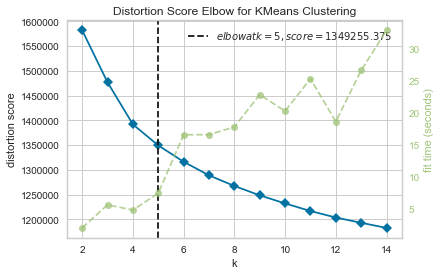

In [99]:
features = ds11.drop(columns=["country","label","label5"],axis=1)

import yellowbrick
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(features)
visualizer.poof()

In [101]:
#Fitting the model with k=5

n_clusters = 4
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)
features = ds11.drop(columns=["country","label","label5"],axis=1)


# Train model
model = cluster.fit(features)

from sklearn.metrics import silhouette_score

preds = cluster.fit_predict(features)
centers = cluster.cluster_centers_
print(centers)

score = silhouette_score (features, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")

[[ 4.43188130e+00  3.26168373e+00  3.79322384e+00  3.85844640e+00
   4.21717051e+00  4.56653178e+00  3.88518607e+00  4.29437436e+00
   4.35856542e+00  3.60707768e+00  3.99420773e+00  3.85178132e+00
   4.16456399e+00  4.42981830e+00  4.53979211e+00  4.11703563e+00
   4.26715861e+00  3.85328890e+00  4.31468698e+00  4.53534873e+00
   4.23073871e+00  3.93612632e+00 -1.73869752e-01  1.28786797e+00
   2.40457538e-01  7.33341268e-01  1.03150044e-03  2.61842418e-03
   9.52154249e-04  3.01515512e-03  2.30103944e-03  3.72927081e-03
   1.98365469e-03  1.03150044e-03  1.50757756e-03  1.34888519e-03
   1.74561612e-03  2.77711656e-03  1.90430850e-03  2.61842418e-03
   2.14234706e-03  3.57057843e-03  1.66626994e-03  3.41188606e-03
   1.19019281e-03  2.06300087e-03  1.11084662e-03  1.11084662e-03
   8.22018567e-01  8.38863763e-01  8.50845037e-01]
 [ 3.53762190e+00  1.95526528e+00  2.84235484e+00  2.80522502e+00
   3.63424890e+00  4.15594524e+00  2.65429006e+00  3.40914378e+00
   3.38328711e+00  3.0115

In [ ]:
from sklearn.cluster import KMeans
#adding labels to the dataframe
ds1['label5_all_features'] = model.labels_



In [ ]:
ds1.label5_all_features.value_counts()



In [ ]:
ds1.groupby("label")[["HSNScale","DDPScale","DDNScale","DDMScale"]].mean()

In [72]:
#lets try with k=4 and taking into account all the features except country and age
n_clusters = 4
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)
features = ds1.drop(columns=["country","accuracy","age","gender"],axis=1)

# Train model
model = cluster.fit(features)

from sklearn.metrics import silhouette_score

preds = cluster.fit_predict(features)
centers = cluster.cluster_centers_
print(centers)

score = silhouette_score (features, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")

[[4.04547156e+00 3.84119261e+00 3.90980539e+00 2.81979790e+00
  2.99382485e+00 4.00467814e+00 4.00873253e+00 3.23197355e+00
  4.07690868e+00 2.23502994e+00 2.11077844e+00 2.08651447e+00
  2.72523703e+00 3.77002246e+00 4.19061876e+00 3.67882984e+00
  3.33414421e+00 2.78255988e+00 2.89745509e+00 3.68500499e+00
  3.31405938e+00 2.33738772e+00 6.58647705e-01 1.62175649e-03
  1.24750499e-03 1.24750499e-03 4.36626747e-03 3.86726547e-03
  4.80289421e-03 1.18512974e-03 1.18512974e-03 1.12275449e-03
  1.62175649e-03 4.67814371e-03 5.67614770e-03 3.18113772e-03
  2.99401198e-03 2.74451098e-03 3.11876248e-03 4.11676647e-03
  3.68013972e-03 3.55538922e-03 2.43263473e-03 1.74650699e-03
  3.55538922e-03 5.34627620e-01 6.99307635e-01 6.11695359e-01]
 [2.93597417e+00 2.93274531e+00 3.02252323e+00 1.96164750e+00
  2.22688612e+00 3.27319263e+00 3.11820759e+00 2.11159238e+00
  3.00417389e+00 1.68294220e+00 1.57087730e+00 1.51874311e+00
  1.91085210e+00 2.89659789e+00 3.09237675e+00 2.60072452e+00
  2.091

In [73]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn import datasets

# Load the data

features = ds1.drop(columns="country",axis=1)

# Standardize the feature matrix


# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)
# ica = FastICA(n_components=0.99, whiten=True)

# Conduct PCA
features_pca = pca.fit_transform(features)

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

#the features have no more meanings but the relationship between the points is still the same

Original number of features: 51
Reduced number of features: 19


In [74]:
#lets try with k=4 and taking into account all the features except country and age
n_clusters = 4
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)


# Train model
model = cluster.fit(features_pca)

from sklearn.metrics import silhouette_score

preds = cluster.fit_predict(features_pca)
centers = cluster.cluster_centers_
print(centers)

score = silhouette_score (features_pca, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")

[[-1.38510820e-01 -3.80974341e-01  5.47020709e-01 -3.25270097e-03
  -4.61829071e-01  3.42570063e-01  2.68467801e-02  4.87162512e-01
  -2.20914619e-02 -4.06477569e-03  2.71006564e-01  1.19347369e-01
  -7.03567277e-02 -2.41253839e-01  2.51118356e-01  4.50598743e-01
   4.38606784e-02 -1.02359618e-01  5.87033807e-02]
 [-3.35451114e-01  1.85530583e+00  5.71137597e-02 -2.49383083e-02
   4.12133029e-03 -9.29684188e-02  9.07463656e-02 -2.04576056e-02
   3.83789065e-02  3.73344785e-02  1.22926318e-03 -9.28839237e-03
   9.12004466e-03 -1.66748338e-02 -2.42212956e-02 -7.09635329e-02
   3.47539579e-02  2.55248751e-02  2.06096766e-02]
 [-2.62612634e-01 -3.86068329e-01 -3.59163350e-01 -1.32866568e-02
   2.95803865e-01 -1.76372244e-01 -6.12562985e-02 -2.99928208e-01
   1.03727641e-02 -1.35442120e-02 -1.78244627e-01 -7.07688614e-02
   4.13556265e-02  1.53077779e-01 -1.51647527e-01 -2.53206096e-01
  -2.76556561e-02  5.69490233e-02 -4.38290470e-02]
 [ 2.43651217e+00  1.87099917e-02 -8.07426848e-02  1.24